### Sampling site directional data

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import smpsite as smp

%matplotlib inline

In [12]:
%%time

params0 = smp.Params(N=10,
                     n0=4,
                     kappa_within_site=100,
                     site_lat=10, 
                     site_long=0,
                     outlier_rate=0.10,
                     secular_method="G",
                     kappa_secular=None)


df_sample = smp.generate_samples(params0)

CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 15.7 ms


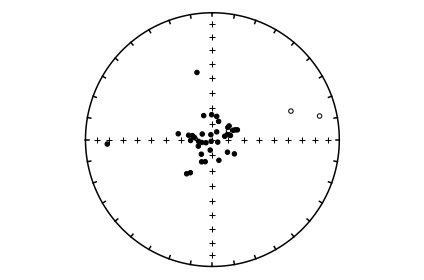

In [13]:
plt.figure()
ipmag.plot_net(1)
ipmag.plot_di(dec=df_sample.vgp_long.values, inc=df_sample.vgp_lat.values)